# DSCI 100 Group 37: Final Project

Raymond Lan, Varun Raval, Tianna Wong, Brendon Yih

# Predicting Experience Level Using Age and Hours Played

## Introduction

In this project, we will be working with local game data collected from a virtual world called PLAIcraft, which is run by a Computer Science research group at UBC, led by Frank Wood. PLAIcraft’s primary goal is “to create an advanced artificial intelligence (AI) that can act in a human-like way in a simulated setting” (PLAI, 2025). The data consists of two files: `players.csv` and `sessions.csv`; however, the aim of our analysis only requires the use of `players.csv`. This project aims to confer analysis and modelling of the data, as well as visualizing it graphically to predict any correlations between the variables used. The researchers want to determine what kind of players contribute a significant amount of data so they can target these players during their recruiting efforts. To explore this research goal, we will investigate whether age and playing hours can be used to predict the experience level of a player. The relationship between the variables (experience level, age, and playing hours) will help identify highly engaged players who are more likely to contribute the most data. The analysis of highly engaged players can help the researchers understand player behaviour, which will be used to “train and develop an advanced AI” (PLAI, 2025) that can interact in PLAIcraft more naturally. 


### Dataset Description 

The player dataset includes unique data for each individual player. There are 196 observations, which indicate the number of players in the dataset and 7 variables that highlight each players' characteristics and in game behaviour. 


|Variable        |Type       |Description of Variable                       |
|:---------------|:----------|:---------------------------------------------|
|experience      |Character  |Experience level of a player                  |
|subscribe       |Character  |If the player is subscribed to the news letter|
|hashedEmail     |Character  |Player's unique hashed email                  |
|played_hours    |Double     |Number of hours played                        |
|name            |Character  |Name of player                                |
|gender          |Character  |Gender of player                              |
|Age             |Double     |Age of player                                 |

# Methods and Results

## Loading the Data into Jupiter

Below only the `players.csv` will be loaded in, as it is the only file that we need to complete our data analysis.

In [3]:
library(tidyverse)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [4]:
# Initial data loading

player_url<- "https://raw.githubusercontent.com/tiannawong/dsci100-individual-project-/refs/heads/main/players.csv"

player_data <- read_csv(player_url)
head(player_data)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


The head is shown above for `players.csv`.

## Wrangling the Data

Below, we will want to choose only the columns that are necessary, since we are trying to predict which experience level plays the most for certain age and playing time.  We will simplify our data by selecting for Experience, played_hours, and Age. We are working with experience as a categorial variable, so we will convert it to a factor type using the `as_factor` function. 

In [5]:
# Wrangling data to use only columns that are needed

select_player_data <- player_data |>
    mutate(experience = as_factor(experience)) |>
    select(experience, Age, played_hours) |>
    drop_na()
head(select_player_data)

experience,Age,played_hours
<fct>,<dbl>,<dbl>
Pro,9,30.3
Veteran,17,3.8
Veteran,17,0.0
Amateur,21,0.7
Regular,21,0.1
Amateur,17,0.0


### Summary Statistics

In [6]:
mean_values<- select_player_data|>
    select(played_hours, Age)|>
    map_df(mean, na.rm= TRUE)
mean_values

played_hours,Age
<dbl>,<dbl>
5.904639,20.52062


## Exploratory Data Analysis and Visualizations

In this project, we want to use KNN classification to predict a new user's experience level based on their age and playing hours. Before we model and train the data, we want to perform simple visualizations to get a better understanding of what we are working with.  Below will be graphs that visualize different aspects of the data.

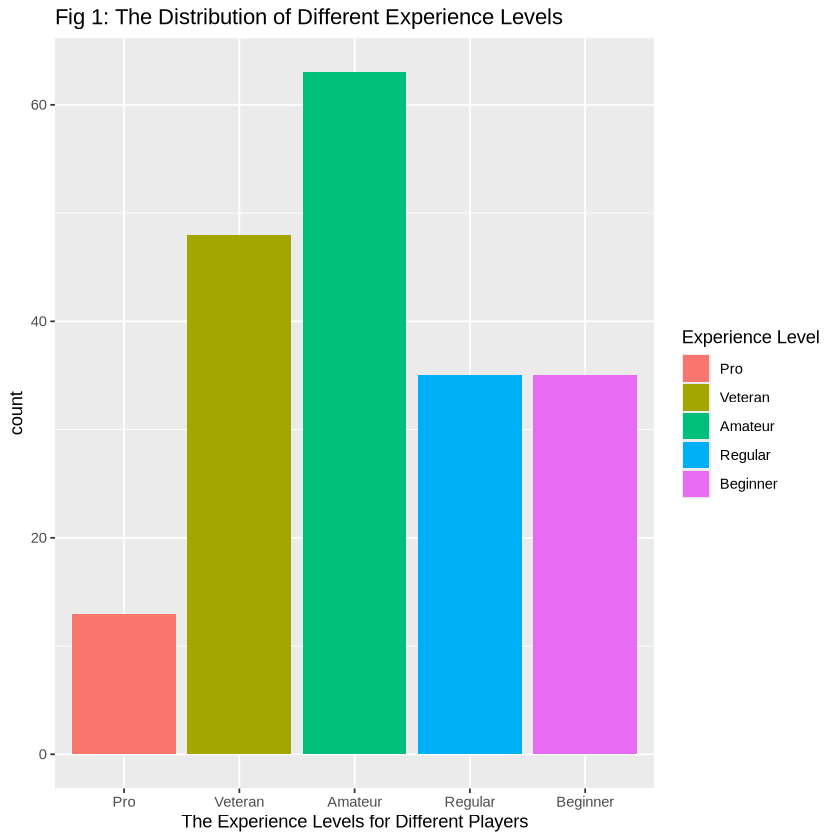

In [7]:
# Create bar graph with player count of each experience level

select_player_data_bar <- select_player_data |>
    ggplot(aes(x = experience, fill = experience)) +
    geom_bar(stat = "count") +
    labs(x = "The Experience Levels for Different Players", title = "Fig 1: The Distribution of Different Experience Levels", fill = "Experience Level")
select_player_data_bar

Explanation of Visualization: Figure 1 is a bar graph that shows the amount of players per experience level.  We can see that there are more amateur players than any other players, followed by veterans. Regular and beginner players are more balanced and pro players make up the smallest group.

Warning message:
“Removed 14 rows containing missing values or values outside the scale range
(`geom_point()`).”


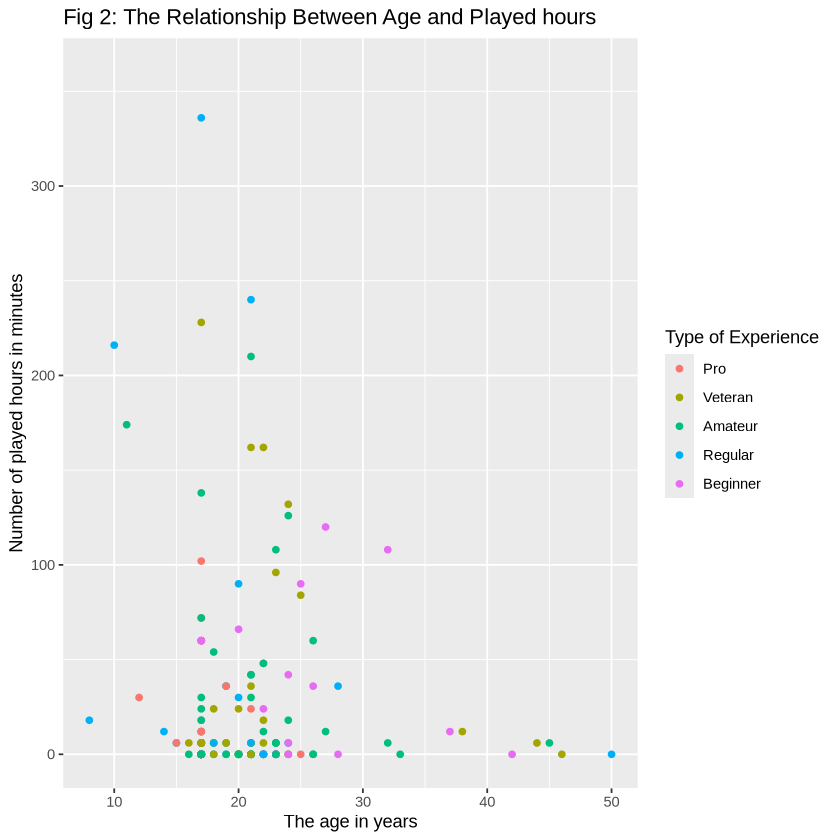

In [8]:
# Create scatterplot with Age vs. played_hours

select_player_data_plot <- select_player_data |>
    mutate(played_mins = (played_hours * 60)) |>
    ggplot(aes(x = Age, y = played_mins)) +
    ylim(0, 360) +
    geom_point(aes(color = experience)) +
    labs(x = "The age in years", y = "Number of played hours in minutes", color = "Type of Experience", title = "Fig 2: The Relationship Between Age and Played hours")
select_player_data_plot

Explanation of Visualization: Figure 2 is a scatter plot that shows age and the different types of experience levels relative to the playing time in minutes.  To make the graph visually pleasing, we had to limit the amount of play time to 6 hours (360 minutes).  From the graph, we are not able to pick up a pattern on age and playing time

## Training and Modeling the Data

To ensure that our data analysis is reproducible, we will set my seed value to 123.In this portion, we will start to train and model the players data so that we can predict which experience levels fits with a new data point given.

In [15]:
# create the 25/75 split of the training data into training and validation
set.seed(123)
player_split <- select_player_data |>
    drop_na()|>
    initial_split(prop = 0.75, strata = experience)
player_training <- training(player_split)
player_testing <- testing(player_split)

head(player_training)
head(player_testing)

experience,Age,played_hours
<fct>,<dbl>,<dbl>
Amateur,21,0.7
Amateur,17,0.0
Amateur,22,0.2
Amateur,22,0.0
Amateur,17,48.4
Amateur,17,0.5


experience,Age,played_hours
<fct>,<dbl>,<dbl>
Pro,9,30.3
Veteran,17,0.0
Regular,21,0.1
Amateur,21,0.0
Amateur,17,0.1
Pro,17,0.0


In [17]:
# create the standardization recipe (scaling all predictors of Age and played_hours)
players_recipe <- recipe(experience ~ Age + played_hours, data = player_training) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())
players_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



In [33]:
# Creating the specification with tune() as neighbors to find the best k value.
players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")
players_spec

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [39]:
# Set up a grid for the tuning process, use k values from (1, 3, 5, ... 20)
k_vals <- tibble(neighbors = seq(1, 20, by = 2))  # You can adjust the range as needed

# perform 5 cross-validations, and create a workflow
players_vfold <- vfold_cv(player_training, v = 5, strata = experience)

knn_results <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(players_spec) |>
  tune_grid(resamples = players_vfold, grid = k_vals) |>
  collect_metrics()

→ A | warning: ✖ No observations were detected in `truth` for level: Pro.
               ℹ Computation will proceed by ignoring those levels.

There were issues with some computations   A: x1

There were issues with some computations   A: x1





In [40]:
# Filter the results metrics by accuracy
accuracies <- knn_results |>
  filter(.metric == "accuracy")
head(accuracies)

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.2669398,5,0.03015593,Preprocessor1_Model01
3,accuracy,multiclass,0.3414661,5,0.01180199,Preprocessor1_Model02
5,accuracy,multiclass,0.2991978,5,0.03626194,Preprocessor1_Model03
7,accuracy,multiclass,0.2987711,5,0.04352161,Preprocessor1_Model04
9,accuracy,multiclass,0.2910992,5,0.03722152,Preprocessor1_Model05
11,accuracy,multiclass,0.2998891,5,0.02821629,Preprocessor1_Model06


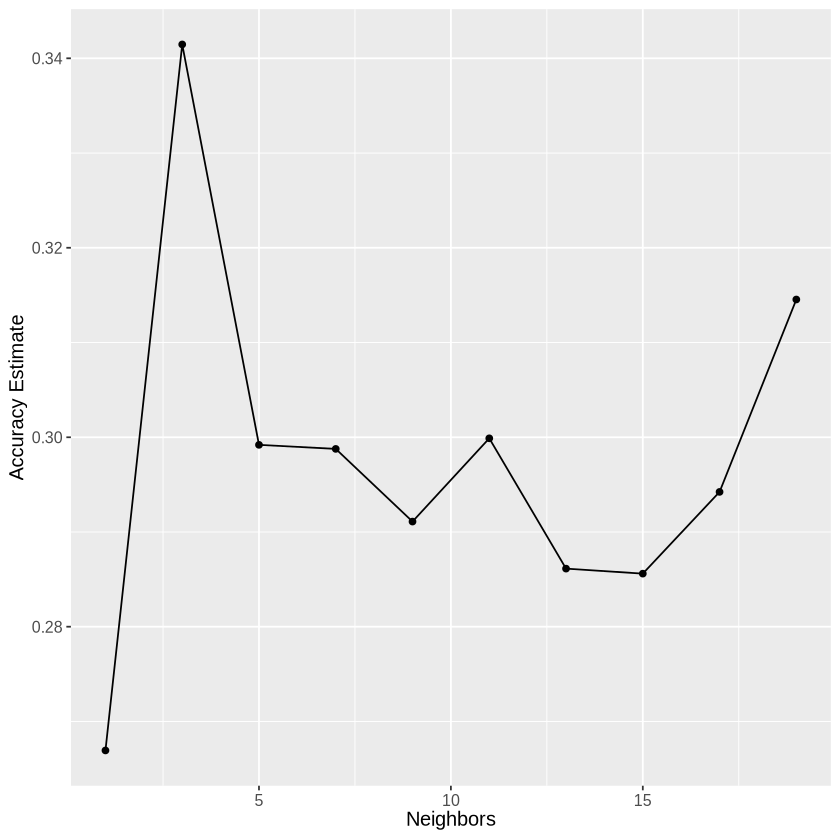

In [41]:
# plotting the k-nn with accuracy
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") +
  theme(text = element_text(size = 12))
accuracy_vs_k

In [53]:
# returning the best k as a numerical answer
best_k <- accuracies |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
best_k

[1] 3

We now know that the best k- nearest neighb

In [50]:
# specifying model with the best_k (3)
players_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
    set_engine("kknn") |>
    set_mode("classification")
players_tune

# fitting the model
knn_fit <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(players_tune) |>
  fit(data = player_training)

knn_fit

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = best_k
  weight_func = rectangular

Computational engine: kknn 


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(3,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.6666667
Best kernel: rectangular
Best k: 3

In [51]:
# use fitted model to predict testing set
player_test_predictions <- predict(knn_fit, player_testing) |>
  bind_cols(player_testing)

player_test_predictions <- predict(knn_fit, player_testing) |>
  bind_cols(player_testing)

player_test_predictions |>
  metrics(truth = experience, estimate = .pred_class) |>
  filter(.metric == "accuracy")

player_test_predictions |>
    precision(truth = experience, estimate = .pred_class, event_level="first")

player_test_predictions |>
    recall(truth = experience, estimate = .pred_class, event_level="first")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.3


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,macro,0.2142857


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,macro,0.2259005


In [52]:
# Creating confusion matrix
confusion <- player_test_predictions |>
             conf_mat(truth = experience, estimate = .pred_class)
confusion

          Truth
Prediction Pro Veteran Amateur Regular Beginner
  Pro        0       2       0       1        1
  Veteran    0       1       2       1        0
  Amateur    3       7      11       3        4
  Regular    1       1       2       1        2
  Beginner   1       2       1       1        2

# Discussion

